In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
#import sima

In [126]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    
    from: `StackOverflow <http://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries>`_
    '''
    data = sio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

def createBuckets (cai1result,cai1deconvo,bucketNumber):
    '''
    take: actual spike train, deconvolved spike train, number of buckets 
    return: n x bucketsize matrix containing firing rates in buckets, relative to the max value per trace
    '''
    stepWidth = len(cai1result[0])/bucketNumber
    caiResultBucket = np.zeros((len(cai1deconvo),bucketNumber))

    for i,col in enumerate(cai1result):
        for j in range(0,bucketNumber):
            caiResultBucket[i,j] = sum(col[j*stepWidth:j*stepWidth+stepWidth]) 
    for i in caiResultBucket:
        i[...] = i/max(i)

    stepWidth = len(cai1deconvo[0])/bucketNumber
    
    caiDeconvoBucket = np.zeros((len(cai1deconvo),bucketNumber))
    
    for i,col in enumerate(cai1deconvo):
        for j in range(0,bucketNumber):
            caiDeconvoBucket[i,j] = sum(col[j*stepWidth:j*stepWidth+stepWidth])
    for i in caiDeconvoBucket:
        i[...] = i / max(i)

    return(np.nan_to_num(caiDeconvoBucket),np.nan_to_num(caiResultBucket))

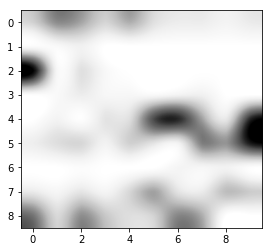

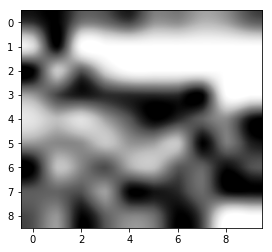

________________________


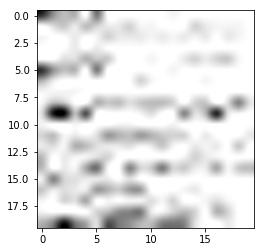

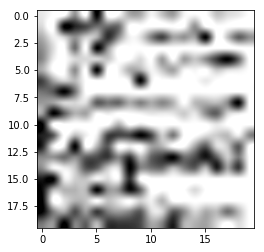

________________________


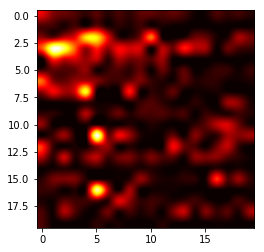

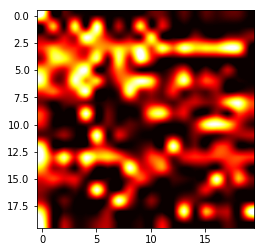

In [125]:
plt.imshow(cai1Buckets[0], cmap='Greys', interpolation='spline16')
plt.show()
plt.close()
plt.imshow(cai1Buckets[1], cmap='Greys', interpolation='spline16')
plt.show()
plt.close()

print '________________________'
plt.imshow(campBuckets[0], cmap='binary', interpolation='spline16')
plt.show()
plt.close()
plt.imshow(campBuckets[1], cmap='binary', interpolation='spline16')
plt.show()
plt.close()
print '________________________'
plt.imshow(gecoBuckets[0], cmap='hot', interpolation='spline16')
plt.show()
plt.close()
plt.imshow(gecoBuckets[1], cmap='hot', interpolation='spline16')
plt.show()
plt.close()


In [92]:
len(cai1result[0])

11999

Todo: the below is missing mountains of deconvolved APs, fix!

In [66]:
cai1deconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolvedCai1Aps.csv",sep = " ").as_matrix().transpose()
gecoDeconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolvedGecoAps.csv",sep = " ").as_matrix().transpose()
campDeconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolvedCampAps.csv",sep = " ").as_matrix().transpose()

In [67]:
campresult = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai2_CAMP_full_aps.csv",sep = " ").as_matrix().transpose()
gecoresult = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai2_geco_full_aps.csv",sep = " ").as_matrix().transpose()
cai1result = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai1_full_aps.csv",sep = " ").as_matrix().transpose()

TODO below: bucket firing rates and heat map over that... what size buckets do I want? 20?

In [124]:
cai1Buckets = createBuckets(cai1result,cai1deconvo,10)
campBuckets = createBuckets(campresult.transpose(),campDeconvo,20)
gecoBuckets = createBuckets(gecoresult.transpose(),gecoDeconvo,20)

In [18]:

fileString = "data_20150526_cell2_001.mat  data_20150605_cell3_001.mat  data_20150605_cell6_003.mat  data_20150605_cell7_003.mat  data_20150707_cell3_001.mat  data_20150526_cell2_002.mat  data_20150605_cell3_002.mat  data_20150605_cell6_004.mat  data_20150701_cell2_001.mat  data_20150707_cell3_002.mat  data_20150527_cell1_001.mat  data_20150605_cell6_001.mat  data_20150605_cell7_001.mat  data_20150701_cell2_002.mat  data_20150707_cell3_003.mat  data_20150605_cell1_001.mat  data_20150605_cell6_002.mat  data_20150605_cell7_002.mat  data_20150707_cell1_001.mat  data_20150707_cell8_001.mat".split("  ")
path = '/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-2/jRCAMP1a_data/'
cai2camp = []

#REMARK: value dict 0 is the CNI data, 4 the clamp-determined spike activity - interpolated with values to a factor or
# 20, meaning 2 data points of CNI result in 40 corresponding data points
for i,cell in enumerate(fileString):
    collumn = _todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][4])['valueMatrix']
    stepwidth = len(collumn)/len(_todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][0])['valueMatrix'])
    localList = []
    for pos in range(len(collumn)/stepwidth):
        localList.append(np.sum(collumn[pos*stepwidth:pos*stepwidth+stepwidth]))
    cai2camp.append(localList)
campFrame = pd.DataFrame(data=cai2camp,index=range(len(cai2camp)))
#testFrame.to_csv("/home/maximilian/unistuff//paris_ens/cal_neuroim/testData/cai2_CAMP_full_aps.csv",sep = " ")
    #if(len(collumn) == 4800):
     #   xMatrix.append(map(float,collumn))
      #  print(len(collumn)),i
   

In [42]:
campFrame.to_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai2_CAMP_full_aps.csv",sep = " ")

In [54]:
gecoFrame.to_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai2_geco_full_aps.csv",sep = " ")

In [56]:
caiFrame.to_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai1_full_aps.csv",sep = " ")

In [43]:
fileString2 = "data_20150529_cell2_001.mat  data_20150601_cell2_002.mat  data_20150601_cell6_003.mat  data_20150708_cell1_001.mat  data_20150804_cell3_002.mat  data_20150529_cell2_002.mat  data_20150601_cell2_003.mat  data_20150601_cell6_004.mat  data_20150714_cell1_001.mat  data_20150804_cell5_002.mat  data_20150529_cell9_001.mat  data_20150601_cell6_001.mat  data_20150601_cell8_001.mat  data_20150728_cell1_001.mat  data_20150804_cell5_003.mat  data_20150601_cell2_001.mat  data_20150601_cell6_002.mat  data_20150601_cell8_002.mat  data_20150804_cell3_001.mat  data_20150804_cell5_004.mat".split("  ")
path = '/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-2/jRGECO1a_data/'
cai2geco = []

for i,cell in enumerate(fileString2):
    collumn = _todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][4])['valueMatrix']
    stepwidth = len(collumn)/len(_todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][0])['valueMatrix'])
    localList = []
    for pos in range(len(collumn)/stepwidth):
        localList.append(np.sum(collumn[pos*stepwidth:pos*stepwidth+stepwidth]))
    cai2geco.append(localList)
gecoFrame = pd.DataFrame(data=cai2geco,index=range(len(cai2geco)))

In [45]:
fileString3 = "data_071411_cell1_005.mat  data_080311_cell2_001.mat   data_080511_cell7_002.mat  data_082611_cell2_001.mat  data_090711_cell4003.mat  data_072711_cell2_002.mat  data_080511_cell12_002.mat  data_082611_cell1_002.mat  data_090111_cell1002.mat".split("  ")
path = '/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/GCaMP5k_9cells_Akerboom2012/'
cai1 = []
for cell in (fileString3):
    collumn = _todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][4])['valueMatrix']
    stepwidth = len(collumn)/len(_todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][0])['valueMatrix'])
    localList = []
    for pos in range(len(collumn)/stepwidth):
        thisStep = collumn[pos*stepwidth:pos*stepwidth+stepwidth]
        thisStep = thisStep[~np.isnan(thisStep)]
        localList.append(sum(thisStep))
    cai1.append(localList)
caiFrame = pd.DataFrame(data=cai1,index=range(len(cai1)))

37.0

39

5000000
2.04154920578


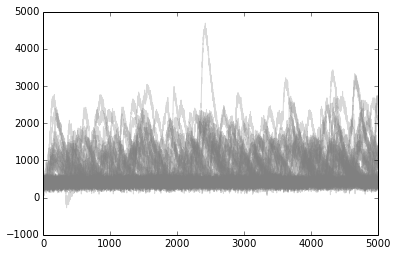

In [2]:
#code used for creation of set1 of simulated data

def alphaKernel (t, A,t_A,t_B):
    return np.float64(A*(np.exp(-t/t_A)-np.exp(-t/t_B)))

xMatrix = np.ndarray(shape=(5000,40),dtype='float32')
apList = []
for i in np.nditer(xMatrix,order='F',flags=['external_loop'],op_flags=['writeonly']):
    localAPlist = []
    xtest = np.repeat(400,5000.)
    xnoise = 80. * np.random.normal(size = xtest.size)
    xtest = xtest +xnoise
    apNumber = int(np.random.normal(loc=4,scale = 2)*3)
    
    for j in range(apNumber):
        xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
        y = (alphaKernel(xdata,np.random.normal(loc=5,scale=0.3) * 400,
                        30* np.random.normal(loc=4,scale=1),10*np.random.normal(loc=4,scale=1)))
        APposition = int(np.random.sample(size=1)* 5000)
        localAPlist.append(APposition)
        APend = APposition + y.size 
        if(APend > xtest.size):
            y.resize(xtest.size-APposition)
        xtest[APposition:APend] = xtest[APposition:APend] + y
        if (APend < 4999 and xtest[APend] - xtest[APend+1] > 80 ):
            corrector = np.arange(xtest[APend] - xtest[APend+1],0,-10)
            if(APend+ corrector.size > xtest.size):
                corrector.resize(xtest.size-APend)
            xtest[APend:APend+corrector.size] = xtest[APend:APend+corrector.size] + corrector
    i[...] = xtest
    plt.plot(xtest,'grey',alpha=0.3)
    apList.append(sorted(localAPlist))
plt.show()
np.savetxt('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/set1',xMatrix,delimiter=',',fmt='%4.6f')

df = pd.DataFrame(apList)
df.to_csv('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/apTimings.csv')

[1835.7959987054762, 2231.5499289338036, 2016.5688714369714, 1844.6903180244822, 2248.072070418118] [77.49949957132353, 113.24314477317957, 144.74707480478946, 102.13289336427091, 147.8347101632229] [54.98610979846562, 34.982240911390775, 53.89255332087763, 23.90595014254043, 41.40430022612339]


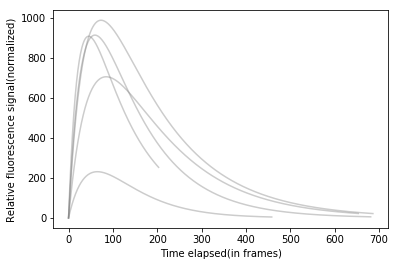

In [43]:
set1,set2,set3 = list(),list(),list()
for i in range(5):
    xdata = np.arange(0,int(500*np.random.normal(loc=1,scale=0.3)),1.)
    set1.append(400*np.random.normal(loc=5,scale=0.3))
    set2.append(30* np.random.normal(loc=4,scale=1))
    set3.append(10*np.random.normal(loc=4,scale=1))
    y = (alphaKernel(xdata,set1[i],set2[i],set3[i]))
    plt.plot(y,'grey',alpha=0.4)
plt.xlabel("Time elapsed(in frames)")
plt.ylabel("Relative fluorescence signal(normalized)")
plt.savefig('alphakernel')
print set1,set2,set3

1896.04114042 120.208700102 25.4247271856

In [70]:
filename = "/home/maximilian/unistuff/paris_ens/cal_neuroim/ADproject/Results.xls.~79~"
start = time.time()
dataMatrix = []
for line in open(filename):
    try:
        dataMatrix.append([float(number) for number in (line).split()])
    except(ValueError): 
        next
dataMatrix = np.matrix(dataMatrix)
print 'total time elapsed reading file:%f' % (time.time()-start), dataMatrix[10,10]

total time elapsed reading file:0.092461 586.298


In [68]:
start = time.time()
frame = pd.read_csv(filename,sep = "\t")
numOfRois = frame.shape[1]
dataMatrix = frame.as_matrix()
print 'total time elapsed reading file:%f' % (time.time()-start), dataMatrix[10,10]

total time elapsed reading file:0.042681 586.298


(5000, 47)